In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

In [2]:
df = pd.read_csv('emailTextsI.csv', index_col='id')

In [12]:
df.head()

,label,text,introduction
id,,,
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...,NaN
1,Ham,got ice thought look az original message ice o...,NaN
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...,NaN
3,Spam,start increasing your odds of success & live s...,NaN
4,Ham,author jra date escapenumber escapenumber esca...,author jra date escapenumber escapenumber esca...


In [4]:
# смотрим длину
len(df)

56361

Transform label to binary.
Spam - 1, Ham - 0

In [5]:
# lb = LabelBinarizer()
# df['label'] = lb.fit_transform(df['label'])
# lb.classes_

# a little EDA

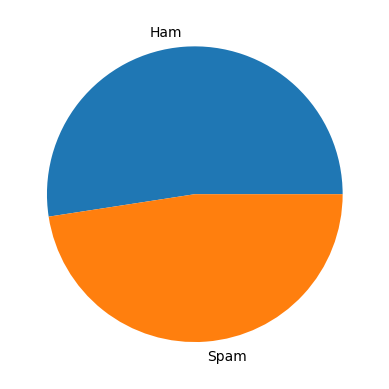

In [6]:
fig, ax = plt.subplots()
labels_dict = df['label'].value_counts().to_dict()
ax.pie(list(labels_dict.values()), labels=list(labels_dict.keys()))
plt.show()

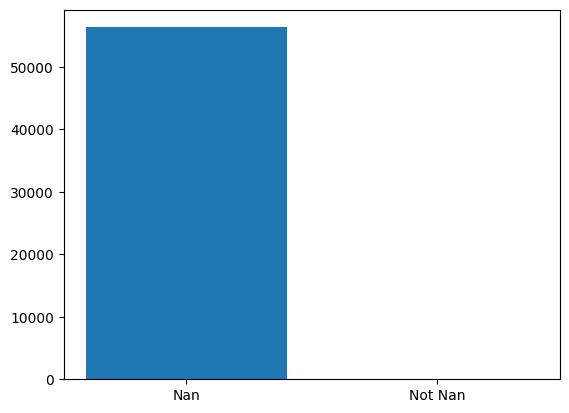

In [7]:
fig, ax = plt.subplots()
labels_dict = df['introduction'].isna().sum()
ax.bar(['Nan', 'Not Nan'], height=[df['introduction'].isna().sum(), df['introduction'].notna().sum()])
plt.show()

In [8]:
df['introduction'].notna().sum()

19

In [9]:
df[df['introduction'].notna()]

,label,text,introduction
id,,,
4,Ham,author jra date escapenumber escapenumber esca...,author jra date escapenumber escapenumber esca...
16,Spam,dear customer it's not a secret that there are...,dear customer it's not a secret that
31,Ham,dear shelley sounds like good start list feel ...,dear shelley
49,Ham,original message cary wintz dear kim translati...,original message cary wintz dear kim
54,Spam,hello my friend i would like to show you the i...,hello my friend
125,Ham,author vlendec date escapenumber escapenumber ...,author vlendec date escapenumber escapenumber ...
135,Ham,sorry if this is a duplicate the original bou...,sorry if this is a duplicate the original bou...
164,Ham,hi all i'm updating a package for submission t...,hi all
187,Ham,hi shelley attached draft northern im would gr...,hi shelley


In [1]:
print('% of NaN texts: ', df['text'].isna().sum()/len(df)*100, '=> can remove')
df = df[df['text'].notna()]

NameError: name 'df' is not defined

In [11]:
# import the necessary libraries
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Extract the sentence only
sentence = df.text

# create vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# vectorizer the text documents
vectorized_documents = vectorizer.fit_transform(sentence)

# reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_documents.toarray())


# cluster the documents using k-means
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, n_init=5,
                max_iter=500, random_state=42)
kmeans.fit(vectorized_documents)


# create a dataframe to store the results
results = pd.DataFrame()
results['document'] = sentence
results['cluster'] = kmeans.labels_

# print the results
print(results.sample(5))

# plot the results
colors = ['red', 'green']
cluster = ['Not intro','intro']
for i in range(num_clusters):
    plt.scatter(reduced_data[kmeans.labels_ == i, 0],
                reduced_data[kmeans.labels_ == i, 1],
                s=10, color=colors[i],
                label=f' {cluster[i]}')
plt.legend()
plt.show()

KeyboardInterrupt: 